# What is Passer Rating?
Passer rating, or quarterback rating (QB rating), is a statistic in American football that measures a player's passing performance using their completions, passing yards, touchdowns, and interceptions relative to attempts. The rating is calculated on a scale from 0 to 158.3, with higher numbers indicating better efficiency, and it serves as a standardized way to compare passers' performances across different seasons and games. 

https://www.nfeloapp.com/tools/qb-passer-rating-calculator/

While ESPN developed a stat known as QBR (Quarterback Rating) awhile back that I believe does a better job of desrcibing a QBs performance, passer rating is still an important stat that we analyze often to understand QB effiency and performance relative to how many passes the QB throws. I will seek to predict Passer Rating using a number of predictors in a multiple regression model.

In [84]:
library(tidyverse)
library(nflfastR)
library(ggthemes)
library(nflreadr)
library(nflplotR)
library(ggrepel)
library(broom)
library(kableExtra)

## Load in Passing Rating Data for NFC East and NFC North

In [85]:
passing_data <- load_nextgen_stats(2020:2024)

glimpse(passing_data)

nfc_east_data <- passing_data |>
  filter(
    team_abbr %in% c('DAL', 'NYG', 'WAS', 'PHI')
  )

nfc_north_data <- passing_data |>
  filter(
    team_abbr %in% c('GB', 'MIN', 'CHI', 'DET')
  )

  head(nfc_east_data)
  head(nfc_north_data)


Rows: 3,026
Columns: 29
$ season                                  <int> 2020, 2020, 2020, 2020, 2020, …
$ season_type                             <chr> "REG", "REG", "REG", "REG", "R…
$ week                                    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ player_display_name                     <chr> "Justin Herbert", "Nick Mullen…
$ player_position                         <chr> "QB", "QB", "QB", "QB", "QB", …
$ team_abbr                               <chr> "LAC", "SF", "CLE", "MIA", "CI…
$ avg_time_to_throw                       <dbl> 2.687305, 2.631663, 3.050420, …
$ avg_completed_air_yards                 <dbl> 5.216843, 5.621564, 7.357672, …
$ avg_intended_air_yards                  <dbl> 7.502345, 6.633950, 9.036446, …
$ avg_air_yards_differential              <dbl> -2.2855014, -1.0123859, -1.678…
$ aggressiveness                          <dbl> 17.98319, 14.41718, 13.78601, …
$ max_completed_air_distance              <dbl> 63.16346, 54.12671, 53.37576, …
$ avg_air_yards_

season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,⋯,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
2020,REG,0,Dwayne Haskins,QB,WAS,2.552485,3.610473,6.868186,-3.257713,⋯,61.41079,68.42931,-7.0185192,20.52961,51.64047,00-0035232,Dwayne,Haskins,7,D.Haskins
2020,REG,0,Dak Prescott,QB,DAL,2.770991,6.785497,7.963196,-1.177700,⋯,68.01802,64.08150,3.9365146,21.05467,52.26204,00-0033077,Rayne,Prescott,4,D.Prescott
2020,REG,0,Daniel Jones,QB,NYG,2.758139,6.436571,7.703519,-1.266947,⋯,62.50000,61.35125,1.1487510,20.22876,59.12279,00-0035710,Daniel,Jones,8,D.Jones
2020,REG,0,Jalen Hurts,QB,PHI,3.113177,7.784805,9.735926,-1.951121,⋯,52.02703,55.65536,-3.6283292,24.25898,53.81634,00-0036389,Jalen,Hurts,2,J.Hurts
2020,REG,0,Alex Smith,QB,WAS,2.630115,3.753155,5.049496,-1.296341,⋯,66.66667,67.36771,-0.7010478,18.49090,53.63875,00-0023436,Alexander,Smith,11,A.Smith
2020,REG,0,Andy Dalton,QB,DAL,2.499267,5.166157,6.975566,-1.809409,⋯,64.86486,64.60019,0.2646746,20.62234,48.31967,00-0027973,Andrew,Dalton,14,A.Dalton


season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,⋯,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
2020,REG,0,Aaron Rodgers,QB,GB,2.724245,5.483065,8.075329,-2.592265,⋯,70.72243,67.37028,3.352155,22.43210,65.19602,00-0023459,Aaron,Rodgers,12,A.Rodgers
2020,REG,0,Kirk Cousins,QB,MIN,2.884070,6.814384,8.288090,-1.473706,⋯,67.63566,62.15519,5.480466,20.73965,57.09544,00-0029604,Kirk,Cousins,8,K.Cousins
2020,REG,0,Mitchell Trubisky,QB,CHI,2.661088,5.059095,7.932150,-2.873055,⋯,67.00337,65.08175,1.921618,20.87453,58.55182,00-0033869,Mitchell,Trubisky,10,M.Trubisky
2020,REG,0,Nick Foles,QB,CHI,2.514331,5.313564,7.814867,-2.501302,⋯,64.74359,62.35759,2.385996,21.23768,56.34777,00-0029567,Nick,Foles,9,N.Foles
2020,REG,0,Matthew Stafford,QB,DET,2.654399,6.783333,9.045166,-2.261833,⋯,64.20455,65.42558,-1.221037,21.49546,65.09962,00-0026498,John,Stafford,9,M.Stafford
2020,REG,1,Matthew Stafford,QB,DET,2.693951,7.094167,9.278293,-2.184126,⋯,57.14286,61.55503,-4.412177,21.42376,59.60176,00-0026498,John,Stafford,9,M.Stafford


## Plot Passer Rating by Season

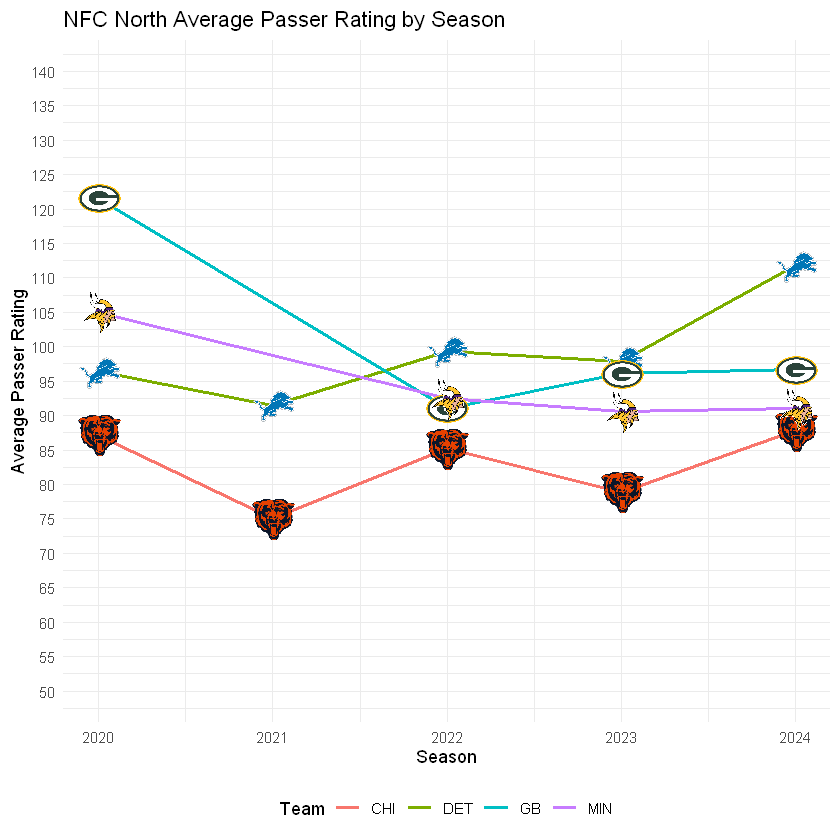

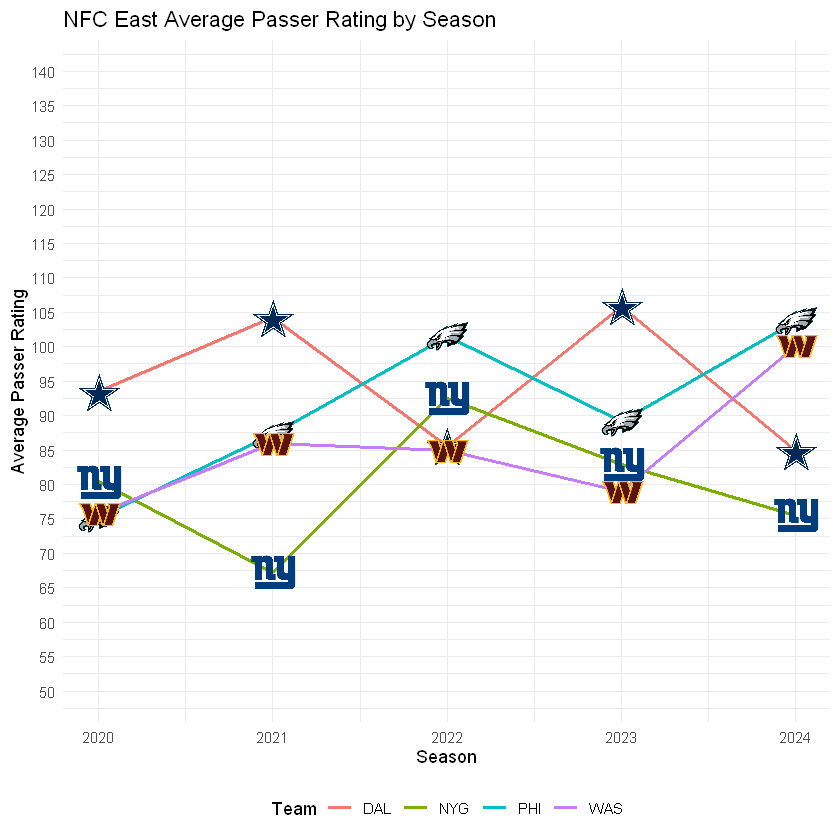

In [86]:
nfc_east_ratings <- nfc_east_data |>
  filter(week == 0) |>
  select(team_abbr, season, passer_rating) |>
  group_by(team_abbr, season) |>
  summarise(mean_passer_rating = mean(passer_rating, na.rm = TRUE), .groups = "drop")

nfc_north_ratings <- nfc_north_data |>
  filter(week == 0) |>
  select(team_abbr, season, passer_rating) |>
  group_by(team_abbr, season) |>
  summarise(mean_passer_rating = mean(passer_rating, na.rm = TRUE), .groups = "drop")

ggplot(data = nfc_north_ratings,
  aes(x = season, y = mean_passer_rating, group = team_abbr)) +
  geom_line(size = 1, aes(color = team_abbr)) +
  geom_nfl_logos(aes(team_abbr = team_abbr), width = 0.06) +
  scale_x_continuous(breaks = 2020:2024) +
  scale_y_continuous(breaks = seq(50, 140, by = 5), limits = c(50, 140)) +
  labs(
    title = "NFC North Average Passer Rating by Season",
    x = "Season",
    y = "Average Passer Rating",
    color = "Team"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

  ggplot(data = nfc_east_ratings,
    aes(x = season, y = mean_passer_rating, group = team_abbr)) +
    geom_line(size = 1, aes(color = team_abbr)) +
    geom_nfl_logos(aes(team_abbr = team_abbr), width = 0.06) +
    scale_x_continuous(breaks = 2020:2024) +
    scale_y_continuous(breaks = seq(50, 140, by = 5), limits = c(50, 140)) +
    labs(
      title = "NFC East Average Passer Rating by Season",
      x = "Season",
      y = "Average Passer Rating",
      color = "Team"
    ) +
    theme_minimal() +
    theme(legend.position = "bottom")



## Plot Trend and Regression Line of Passer Rating and Completion Percentage for NFC East and NFC North Teams


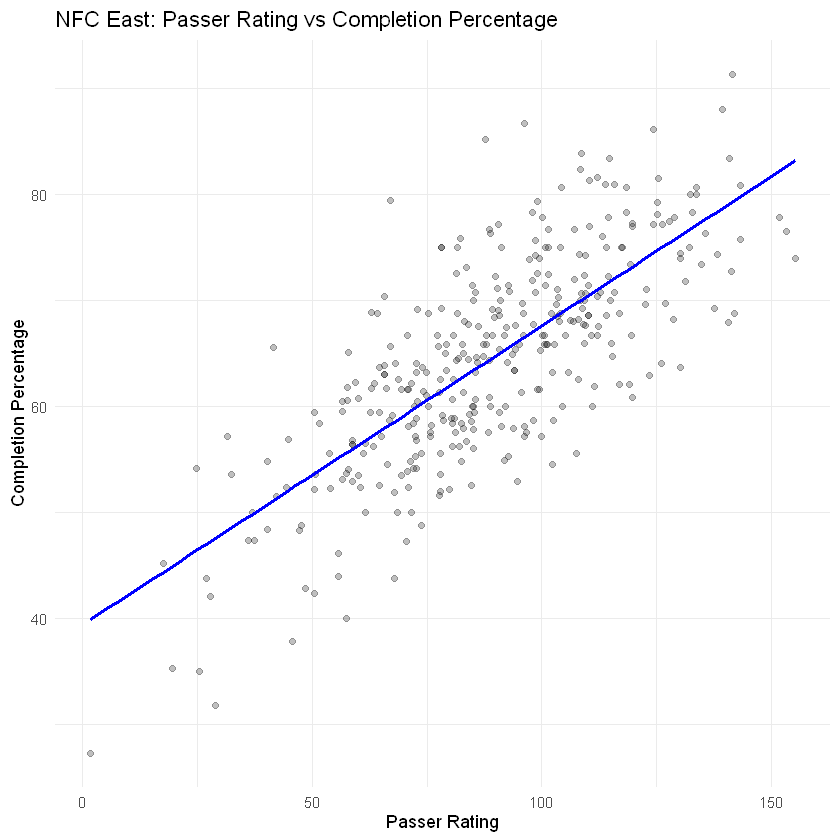

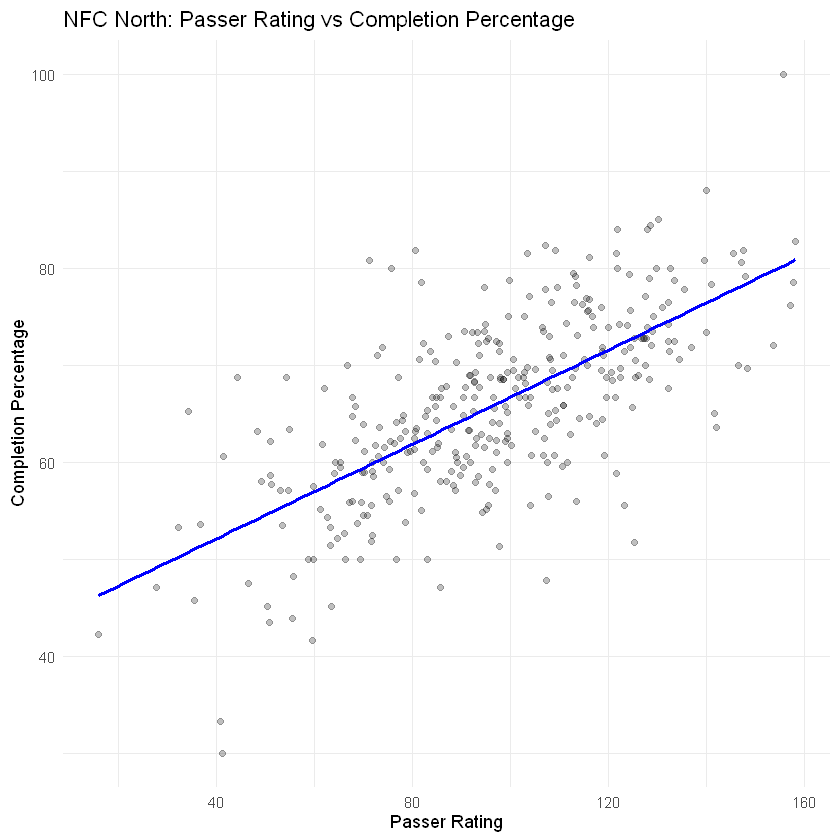

In [87]:

nfc_east_trends <- nfc_east_data |>
  filter(week != 0)

nfc_north_trends <- nfc_north_data |>
  filter(week != 0)

ggplot(data = nfc_east_trends, aes(x = passer_rating, y = completion_percentage)) +
  geom_point(alpha = 0.25) +
  stat_smooth(method = 'lm', formula = y~x, color = "blue", se = FALSE) +
  theme_minimal() +
  labs(
    title = "NFC East: Passer Rating vs Completion Percentage",
    x = "Passer Rating",
    y = "Completion Percentage"
  ) +
  theme(legend.position = "bottom")

ggplot(data = nfc_north_trends, aes(x = passer_rating, y = completion_percentage)) +
  geom_point(alpha = 0.25) +
  stat_smooth(method = 'lm', formula = y~x, color = "blue", se = FALSE) +
  theme_minimal() +
  labs(
    title = "NFC North: Passer Rating vs Completion Percentage",
    x = "Passer Rating",
    y = "Completion Percentage"
  ) +
  theme(legend.position = "bottom")
  

## Bin and Plot Data

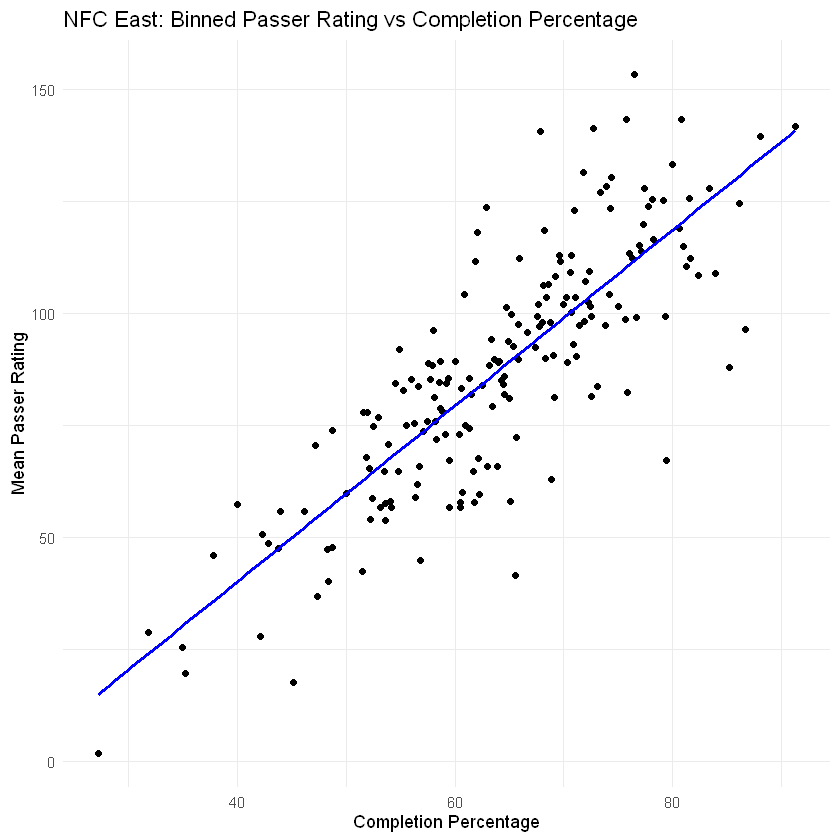

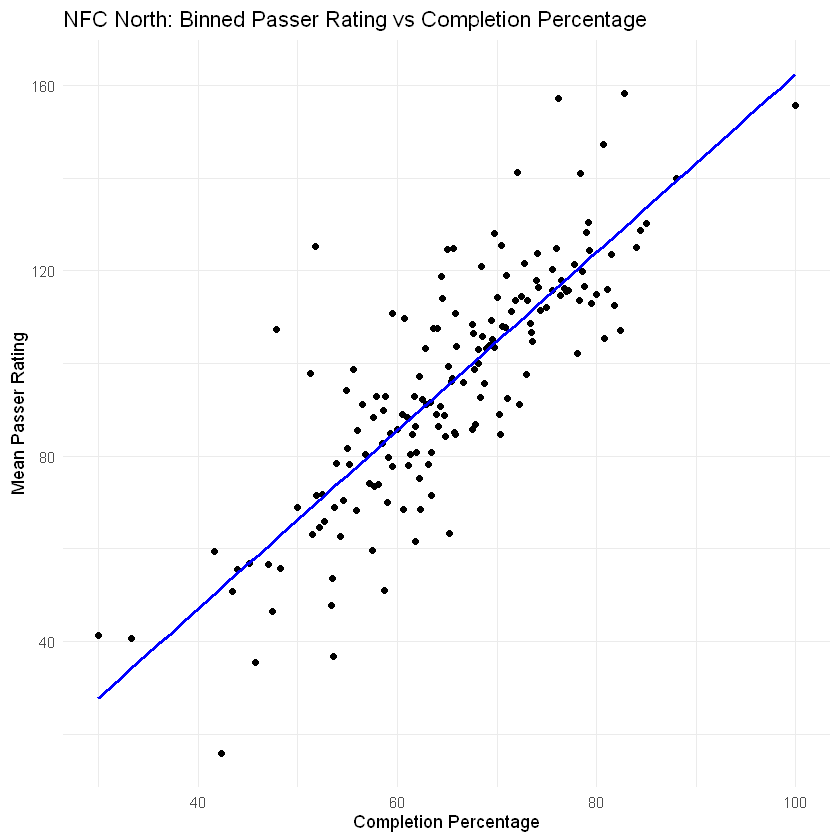

In [88]:
nfc_east_trends |>
    group_by(completion_percentage) |>
    summarize(mean_passer_rating = mean(passer_rating, na.rm = TRUE), .groups = "drop") |>
    ggplot(aes(x = completion_percentage, y = mean_passer_rating)) +
    geom_point() +
    stat_smooth(method = 'lm', formula = y~x, color = "blue", se = FALSE) +
    theme_minimal() +
    labs(
      title = "NFC East: Binned Passer Rating vs Completion Percentage",
      x = "Completion Percentage",
      y = "Mean Passer Rating"
    ) +
    theme(legend.position = "bottom")

nfc_north_trends |>
    group_by(completion_percentage) |>
    summarize(mean_passer_rating = mean(passer_rating, na.rm = TRUE), .groups = "drop") |>
    ggplot(aes(x = completion_percentage, y = mean_passer_rating)) +
    geom_point() +
    stat_smooth(method = 'lm', formula = y~x, color = "blue", se = FALSE) +
    theme_minimal() +
    labs(
      title = "NFC North: Binned Passer Rating vs Completion Percentage",
      x = "Completion Percentage",
      y = "Mean Passer Rating"
    ) +
    theme(legend.position = "bottom")


## Calculate and Plot Aggresiveness
 - In Next Gen Stats, Aggressiveness is a quarterback statistic representing the percentage of pass attempts thrown into tight coverage, defined as where a defender is within one yard or less of the intended receiver at the time of completion or incompletion. This metric quantifies a quarterback's willingness to take risks by targeting receivers in very small windows, effectively measuring their penchant for making difficult, high-reward throws. https://www.instagram.com/p/C6kXQgeRmKK/

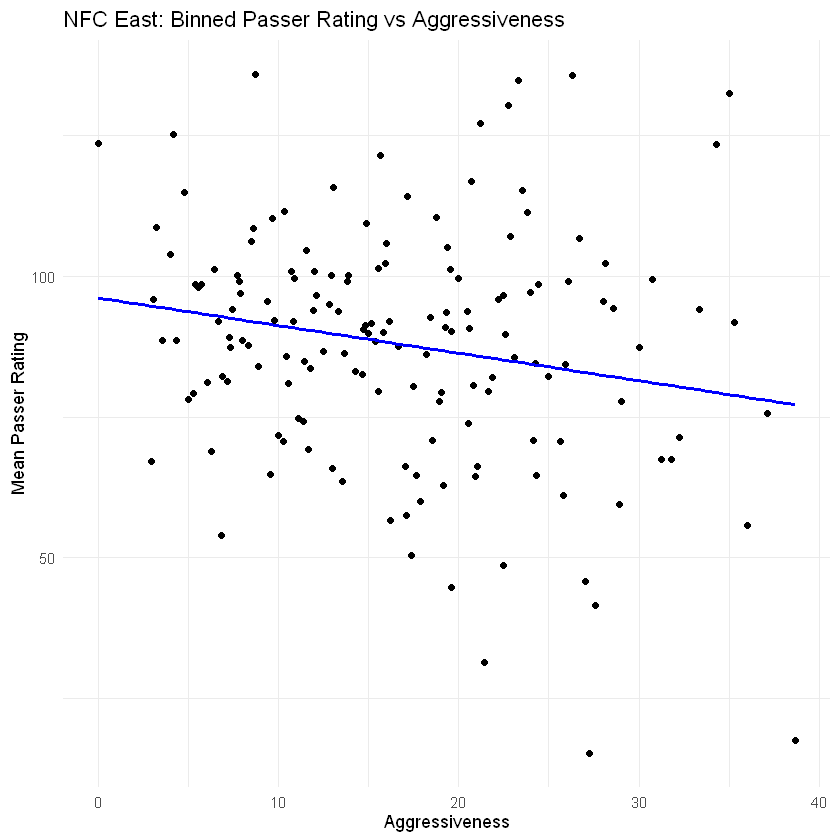

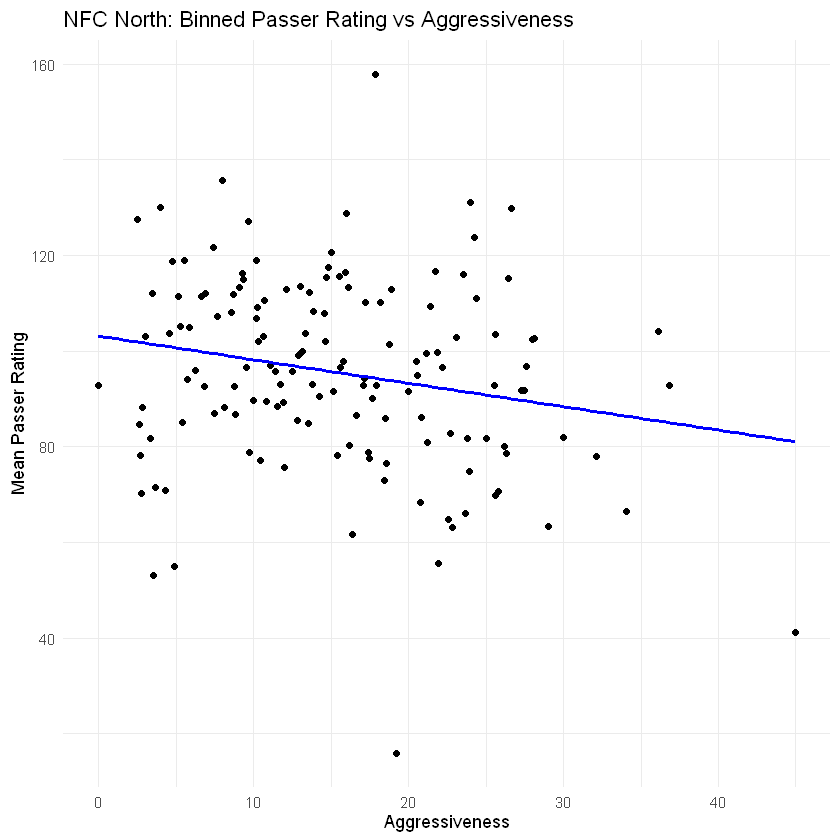

In [93]:
nfc_east_trends |>
    group_by(aggressiveness) |>
    summarize(mean_passer_rating = mean(passer_rating, na.rm = TRUE), .groups = "drop") |>
    ggplot(aes(aggressiveness, mean_passer_rating)) +
    geom_point() +
    stat_smooth(method = 'lm', formula = y~x, color = "blue", se = FALSE) +
    theme_minimal() +
    labs(
      title = "NFC East: Binned Passer Rating vs Aggressiveness",
      x = "Aggressiveness",
      y = "Mean Passer Rating"
    ) +
    theme(legend.position = "bottom")

nfc_north_trends |>
    group_by(aggressiveness) |>
    summarize(mean_passer_rating = mean(passer_rating, na.rm = TRUE), .groups = "drop") |>
    ggplot(aes(aggressiveness, mean_passer_rating)) +
    geom_point() +
    stat_smooth(method = 'lm', formula = y~x, color = "blue", se = FALSE) +
    theme_minimal() +
    labs(
      title = "NFC North: Binned Passer Rating vs Aggressiveness",
      x = "Aggressiveness",
      y = "Mean Passer Rating"
    ) +
    theme(legend.position = "bottom")


## Plot Passing Touchdowns


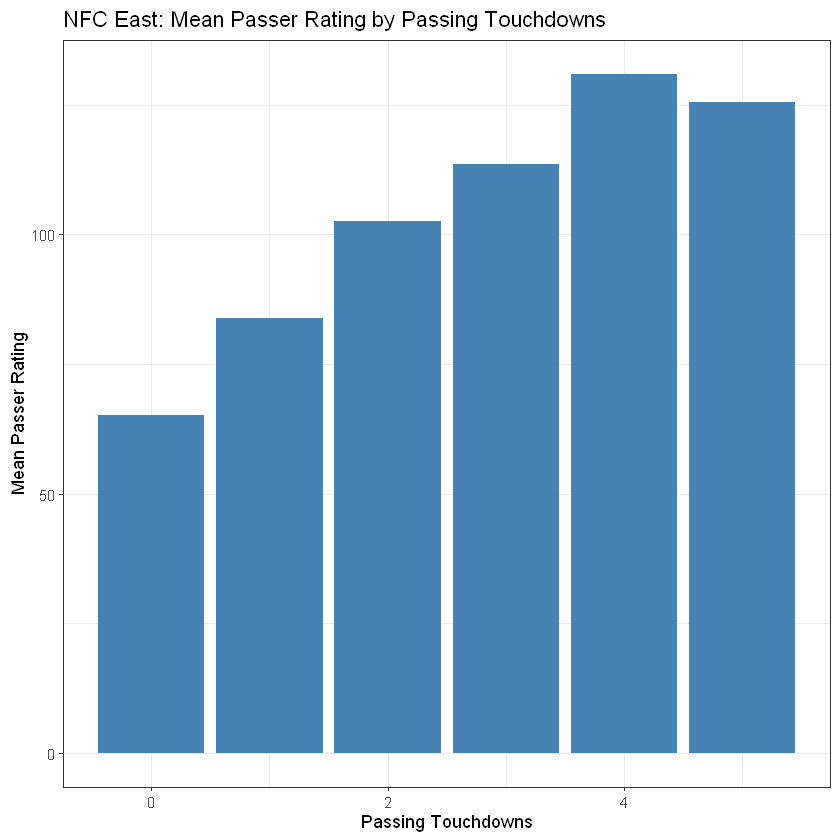

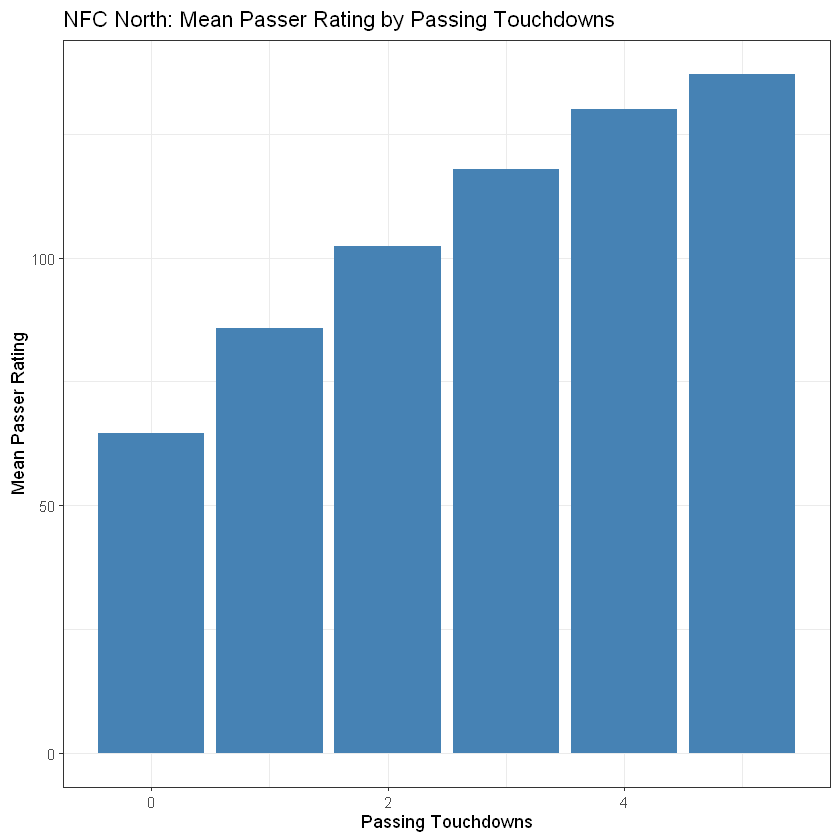

In [95]:
nfc_east_trends |>
    group_by(pass_touchdowns) |>
    summarize(mean_passer_rating = mean(passer_rating, na.rm = TRUE), .groups = "drop") |>
    ggplot(aes(pass_touchdowns, mean_passer_rating)) +
    geom_col(fill = "steelblue") +
    theme_bw() +
    labs(
      title = "NFC East: Mean Passer Rating by Passing Touchdowns",
      x = "Passing Touchdowns",
      y = "Mean Passer Rating"
    )

nfc_north_trends |>
    group_by(pass_touchdowns) |>
    summarize(mean_passer_rating = mean(passer_rating, na.rm = TRUE), .groups = "drop") |>
    ggplot(aes(pass_touchdowns, mean_passer_rating)) +
    geom_col(fill = "steelblue") +
    theme_bw() +
    labs(
      title = "NFC North: Mean Passer Rating by Passing Touchdowns",
      x = "Passing Touchdowns",
      y = "Mean Passer Rating"
    )

## Multiple Linear Regression on passer_rating

In [ ]:
## NFC East Multiple Linear Regression
expected_passer_rating_model_east <- lm(
    passer_rating ~ 1 + completion_percentage + aggressiveness +
    pass_touchdowns + interceptions + pass_yards + avg_intended_air_yards + 
    completion_percentage_above_expectation + attempts + avg_time_to_throw,
    data = nfc_east_data
)

print(summary(expected_passer_rating_model_east))


Call:
lm(formula = passer_rating ~ 1 + completion_percentage + aggressiveness + 
    pass_touchdowns + interceptions + pass_yards + avg_intended_air_yards + 
    completion_percentage_above_expectation + attempts + avg_time_to_throw, 
    data = nfc_east_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.819  -7.439   0.194   7.619  50.034 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -36.33632   16.81838  -2.161   0.0314
completion_percentage                     1.64793    0.16831   9.791  < 2e-16
aggressiveness                           -0.00132    0.10774  -0.012   0.9902
pass_touchdowns                           4.48564    0.50291   8.919  < 2e-16
interceptions                            -5.98634    0.61960  -9.662  < 2e-16
pass_yards                               -0.02472    0.01159  -2.133   0.0336
avg_intended_air_yards                    2.27251    0.39633   5.734 2.02e-08
compl

In [ ]:
## NFC North Multiple Linear Regression
expected_passer_rating_model_north <- lm(
    passer_rating ~ 1 + completion_percentage + aggressiveness +
    pass_touchdowns + interceptions + pass_yards + avg_intended_air_yards + 
    completion_percentage_above_expectation + attempts + avg_time_to_throw,
    data = nfc_north_data
)

print(summary(expected_passer_rating_model_north))


Call:
lm(formula = passer_rating ~ 1 + completion_percentage + aggressiveness + 
    pass_touchdowns + interceptions + pass_yards + avg_intended_air_yards + 
    completion_percentage_above_expectation + attempts + avg_time_to_throw, 
    data = nfc_north_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.621  -7.459  -1.089   8.373  43.264 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -54.514172  20.894766  -2.609  0.00946
completion_percentage                     1.941590   0.207344   9.364  < 2e-16
aggressiveness                           -0.014903   0.124525  -0.120  0.90481
pass_touchdowns                           3.338588   0.540726   6.174 1.80e-09
interceptions                            -7.639831   0.642540 -11.890  < 2e-16
pass_yards                               -0.001377   0.011614  -0.119  0.90569
avg_intended_air_yards                    2.900632   0.446955   6.490 2.86e

## Save Residuals as Passer Rating over Expectation to dataset

In [ ]:
nfc_east_data <- nfc_east_data |>
    mutate(proe = resid(expected_passer_rating_model_east))

nfc_north_data <- nfc_north_data |>
    mutate(proe = resid(expected_passer_rating_model_north))

head(nfc_east_data$proe)
head(nfc_north_data$proe)

1          2          3          4          5          6 
19.9448177  6.5663151 25.3430484 11.2454809 22.8575033 -0.7533372

1           2           3           4           5           6 
-94.6205407  -0.9688609   8.7453958  20.8361389   0.5735181  -2.5993716

## Model Summary Analysis

In [ ]:
nfc_east_final <- nfc_east_data |>
    select(team_abbr, season, week, passer_rating, proe) |>
    filter(week != 0) |>
    group_by(team_abbr, season, week) |>
    summarize(team_passer_rating = mean(passer_rating, na.rm = TRUE),
              team_proe = mean(proe, na.rm = TRUE), .groups = "drop")

nfc_north_final <- nfc_north_data |>
    select(team_abbr, season, week, passer_rating, proe) |>
    filter(week != 0) |>
    group_by(team_abbr, season, week) |>
    summarize(team_passer_rating = mean(passer_rating, na.rm = TRUE),
              team_proe = mean(proe, na.rm = TRUE), .groups = "drop")

head(nfc_east_final, 50)
head(nfc_north_final, 50)


team_abbr,season,week,team_passer_rating,team_proe
<chr>,<int>,<int>,<dbl>,<dbl>
DAL,2020,1,92.46795,2.2521760
DAL,2020,2,109.35284,5.7337330
DAL,2020,3,93.60380,4.5906551
DAL,2020,4,112.85920,3.8598926
DAL,2020,5,70.73413,-10.4393921
DAL,2020,6,65.81790,-8.4651531
DAL,2020,7,36.07456,-13.3693700
DAL,2020,8,64.58333,-2.2883372
DAL,2020,9,72.58772,-1.7205882


team_abbr,season,week,team_passer_rating,team_proe
<chr>,<int>,<int>,<dbl>,<dbl>
CHI,2020,1,104.16667,10.7995915
CHI,2020,2,77.97619,-7.4380278
CHI,2020,3,83.48354,-3.7140704
CHI,2020,4,76.38889,-8.8911754
CHI,2020,5,83.73016,-16.5364922
CHI,2020,6,70.24573,-2.5037872
CHI,2020,7,66.77083,-26.2561539
CHI,2020,8,92.73374,-6.9632454
CHI,2020,9,99.43910,-3.8785749


## Bin Data by Season and Plot PROE vs Actual Passer Rating

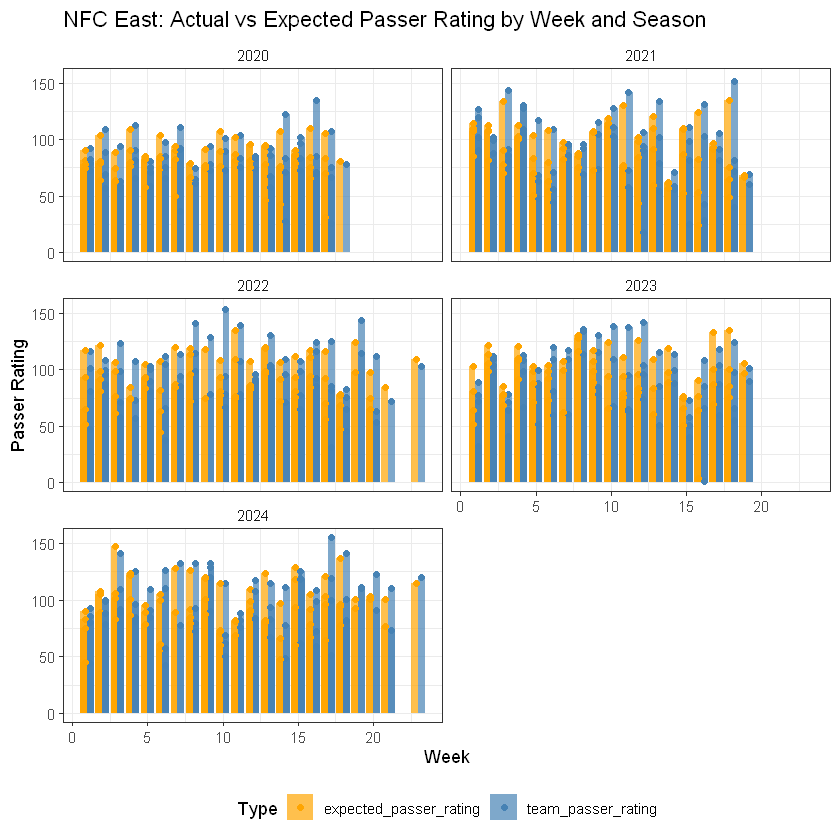

In [ ]:
nfc_east_long <- nfc_east_final |>
  mutate(expected_passer_rating = team_passer_rating - team_proe) |>
  pivot_longer(cols = c(team_passer_rating, expected_passer_rating),
               names_to = "type", values_to = "value")


ggplot(nfc_east_long, aes(x = week, y = value, fill = type)) +
  geom_col(position = "dodge", alpha = 0.7) +
  geom_point(data = nfc_east_long, aes(color = type), position = position_dodge(width = 0.7)) +
  facet_wrap(vars(season), ncol = 2, labeller = label_value) +
  scale_fill_manual(values = c("team_passer_rating" = "steelblue", "expected_passer_rating" = "orange")) +
  scale_color_manual(values = c("team_passer_rating" = "steelblue", "expected_passer_rating" = "orange")) +
  theme_bw() +
  labs(
    title = "NFC East: Actual vs Expected Passer Rating by Week and Season",
    x = "Week",
    y = "Passer Rating",
    fill = "Type",
    color = "Type"
  ) +
  theme(strip.background = element_blank(), legend.position = "bottom")


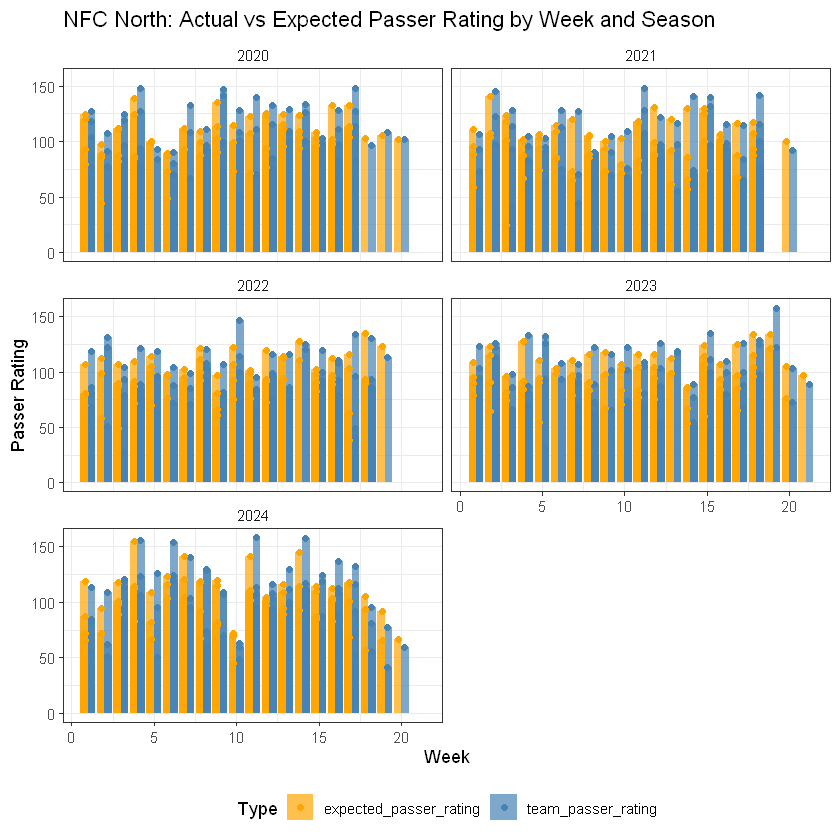

In [ ]:
nfc_north_long <- nfc_north_final |>
  mutate(expected_passer_rating = team_passer_rating - team_proe) |>
  pivot_longer(cols = c(team_passer_rating, expected_passer_rating),
               names_to = "type", values_to = "value")

ggplot(nfc_north_long, aes(x = week, y = value, fill = type)) +
  geom_col(position = "dodge", alpha = 0.7) +
  geom_point(data = nfc_north_long, aes(color = type), position = position_dodge(width = 0.7)) +
  facet_wrap(vars(season), ncol = 2, labeller = label_value) +
  scale_fill_manual(values = c("team_passer_rating" = "steelblue", "expected_passer_rating" = "orange")) +
  scale_color_manual(values = c("team_passer_rating" = "steelblue", "expected_passer_rating" = "orange")) +
  theme_bw() +
  labs(
    title = "NFC North: Actual vs Expected Passer Rating by Week and Season",
    x = "Week",
    y = "Passer Rating",
    fill = "Type",
    color = "Type"
  ) +
  theme(strip.background = element_blank(), legend.position = "bottom")

# Conclusion
My model performed better than I expected. I believe this is due to Passer Rating already being derived from other stats like passing yards or completion percentage. This is really nice for teams or players to get a better idea of how they could expect to perform against a given team. At the end of the day though, the better overall team, and the team more prepared and schemed for the game will prevail. 

Something I would look to do is actually use the PBP data and manually calculate a new variable for passer rating to get a better understanding of how other factors affect passer rating.